In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

images = [cv2.imread('./images/andrew.jpeg'), cv2.imread('./images/bengio.jpeg'),
          cv2.imread('./images/goodfellow.jpeg'), cv2.imread('./images/leskovec.jpeg')]
test_image = cv2.imread('./images/1.jpg')

# www = cv2.imread('./images/www.png')

In [3]:
def Convloution2D(img, filters, stride, padding):

    f = filters[0].shape[0]
    
    if (padding != 'valid') :  p = int((f - 1) / 2)  #get a padding size!
    else:
       p = 0

    # add pading to image
    new_image_size = (img.shape[0] + 2 * p, img.shape[1] + 2 * p)
    if img.ndim == 3: #number of dimension of an array -> if 3d
        image_padding = np.zeros((*new_image_size, img.shape[2]))  
    else:
        image_padding = np.zeros(new_image_size)

    for row in range(img.shape[0]):
        for col in range(img.shape[1]): 
            image_padding[row + p, col + p] = img[row, col]   #copy image field to image
    img = image_padding

    # finding output size images
    def out_size(img):
        X = int((img.shape[0] + 2 * (p - f)) / stride + 1)
        Y = int((img.shape[1] + 2 * (p - f)) / stride + 1)
        return (X, Y)
    output_size = out_size(img)
    outputs = [np.zeros(output_size) for fi in filters]

  
    # Convolution
    print(img.shape)
    for i, output in enumerate(outputs):
        for row in range(output_size[0]):
            for col in range(output_size[1]):
                output[row, col] = np.sum(
                    filters[i] * img[(row * stride):(row * stride) + f, (col * stride):(col * stride) + f])
        if img.ndim == 3:  #number of dimension of array
            output = output / img.shape[2]

    return outputs

In [4]:
def pick_image(image):  #draw and show image with plot
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)


def convert_to_gray_color(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(225, 225, 3)


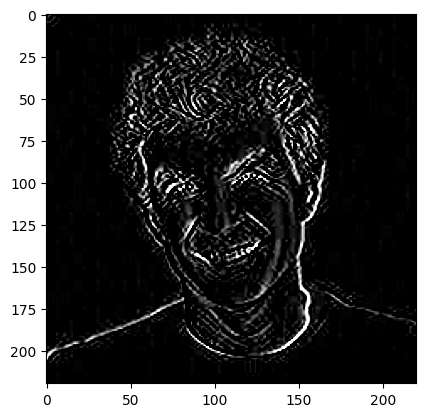

In [22]:
#Test conv2D

kernel = np.array([[[-1, -1, -1], [0, 0, 0], [1, 1, 1]], [[1, 1, 1],
                  [0, 0, 0], [-1, -1, -1]], [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]])
filters = [kernel]
pick_image(Convloution2D(images[1], filters=filters, stride=1, padding='valid')[0])

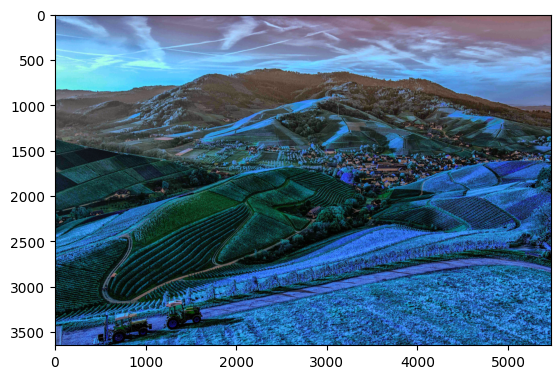

In [24]:
plt.imshow(test_image)

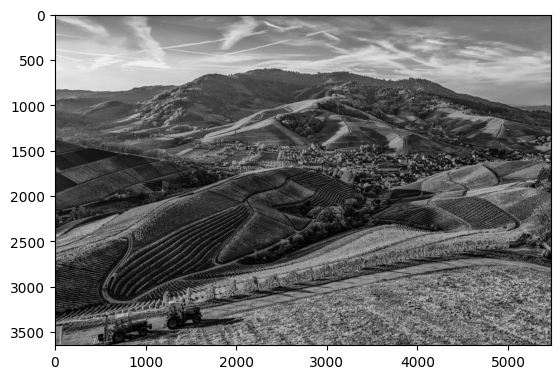

In [27]:
gray = convert_to_gray_color(test_image)
pick_image(gray)

In [29]:
# we use this from kernel library (kernel.text)
horizontal_edge = np.array([[-1, -1, -1],
                            [0, 0, 0],
                            [1, 1, 1]])

vertical_edge = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])

sharpening = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

weighted_averaging_3x3 = (1/16)*np.array([[1, 2, 1],
                                          [2, 4, 2],
                                          [1, 2, 1]])

layer_one_kernekl = [horizontal_edge, vertical_edge,
                     sharpening, weighted_averaging_3x3]

robert_x = np.array([[1, 0],
                     [0, -1]])

robert_y = np.array([[0, +1],
                     [-1, 0]])

averaging_2x2 = (1/4)*np.array([[1, 1],
                                [1, 1]])

layer_two_kernekl = [robert_x, robert_y, averaging_2x2]

In [35]:
# we want to have a 3d filter and use 2d convloution

FirstFilter = []
for i in layer_one_kernekl:
    FirstFilter.append(np.concatenate([i, i, i], axis=1).reshape((3, 3, 3), order='F'))  # 3 , 3 , 3 are a filter sizes

plottingImages = []
featuresMap = []   #for arrange filters and images in a order

for image in images:
    laye1 = Convloution2D(image, FirstFilter, stride=1, padding='same')
    # print(laye1[0].ndim)   
    #ndim -> nummber dimension of an array
    list_image = [image]
    list_image.extend(laye1)
    plottingImages.append(list_image)
    new_shape = (*list(laye1[0].shape)[:2], 4)   # arranges all images in a row to gether
    # we need to concatenate the 4 layers gor next step
    
    new_4d_image = np.concatenate(laye1, axis=1).reshape(new_shape, order='F')
    featuresMap.append(new_4d_image)


(226, 226, 3)
(227, 227, 3)
(222, 268, 3)
(202, 202, 3)


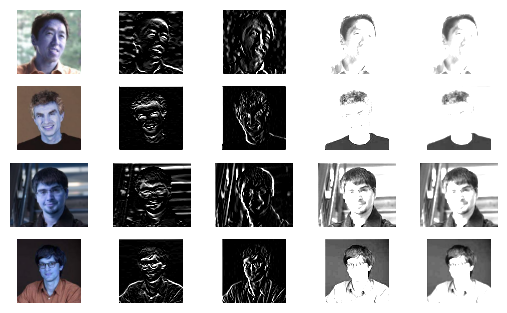

In [37]:
for i, image_set in enumerate(plottingImages):
    for j, image in enumerate(image_set):
        plt.subplot(len(image_set), len(plottingImages) +
                    1, i * len(image_set) + j + 1)
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')


plt.show()